The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

The points distribution for this case is as follows:

# 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [3]:
df_vehicle = pd.read_csv("vehicle.csv")
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
df_vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [6]:
df_vehicle.columns[df_vehicle.isna().any() == True]

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [7]:
df_dropped_na = df_vehicle.dropna()
df_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [8]:
df_dropped_na.columns[df_dropped_na.isna().any() == True]

Index([], dtype='object')

### Observation
> There are no columns that have missing values

In [9]:
df_dropped_na['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

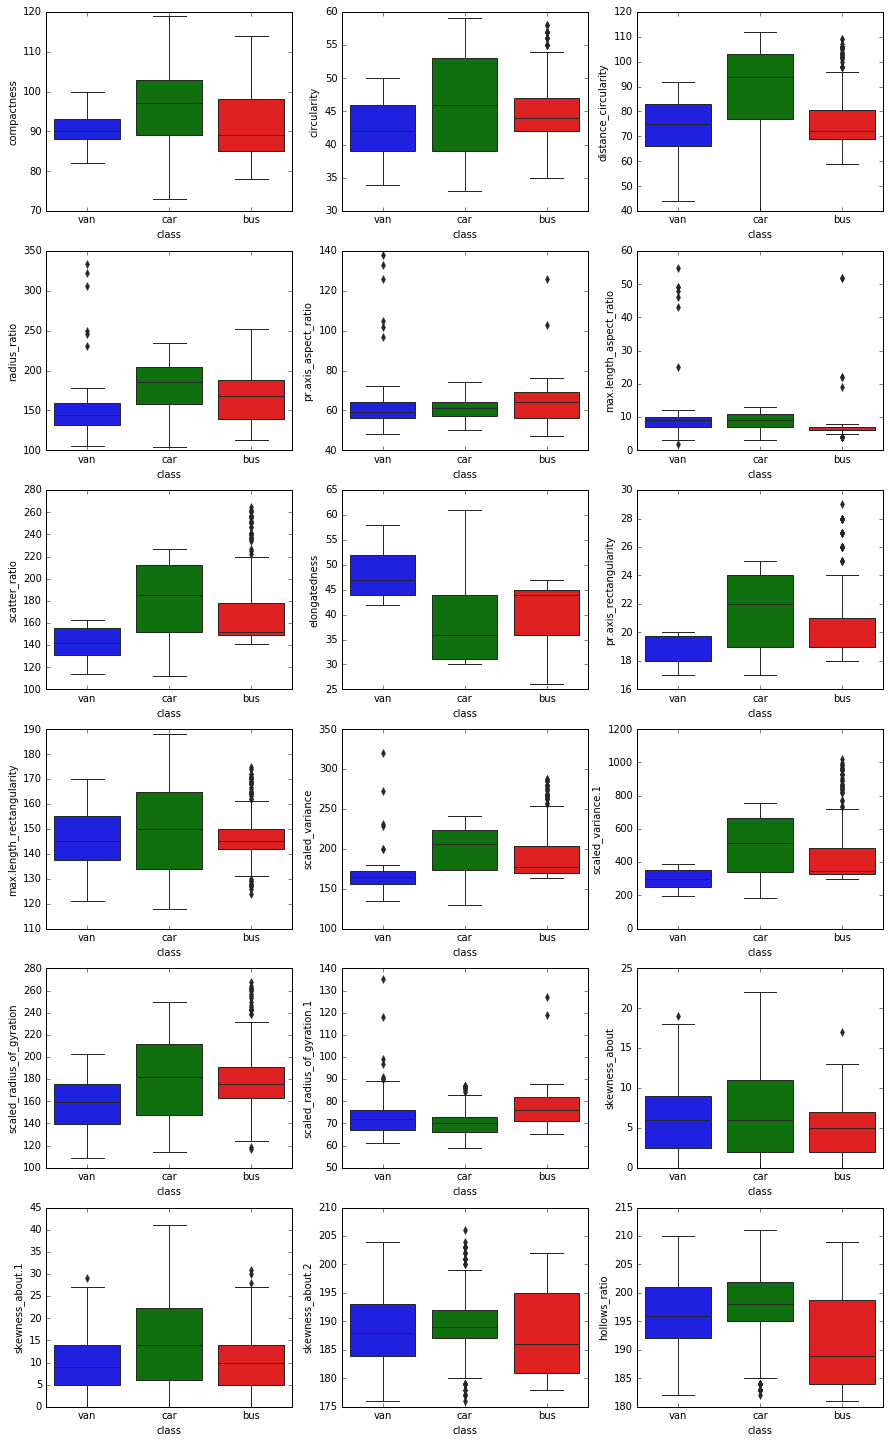

In [11]:
from matplotlib import gridspec
fig, axs = plt.subplots(6, 3,figsize=(15,25))
for i,el in enumerate(list(df_dropped_na.columns.values)[:-1]):
    sns.boxplot(x='class',y=el,data = df_vehicle, ax=axs[int(i/3)][i%3])

In [12]:
df_numeric_columns = df_dropped_na._get_numeric_data()

In [13]:
df_outliers_dropped = df_numeric_columns[(df_numeric_columns > (df_numeric_columns.quantile(0.25) - 1.5*stats.iqr(df_numeric_columns))) \
              & (df_numeric_columns < (df_numeric_columns.quantile(0.25) + 1.5*stats.iqr(df_numeric_columns)))].dropna()
df_outliers_dropped = df_outliers_dropped.join(df_dropped_na['class'])
df_outliers_dropped.shape

(574, 19)

In [14]:
df_outliers_dropped['class'].value_counts()

car    217
van    195
bus    162
Name: class, dtype: int64

### Observation
- Highy skewed outliers are removed from the dataset

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [15]:
df_one_hot_coded = pd.get_dummies(df_outliers_dropped, columns=['class'])
df_one_hot_coded.shape

(574, 21)

In [16]:
corr_df = df_one_hot_coded.corr()

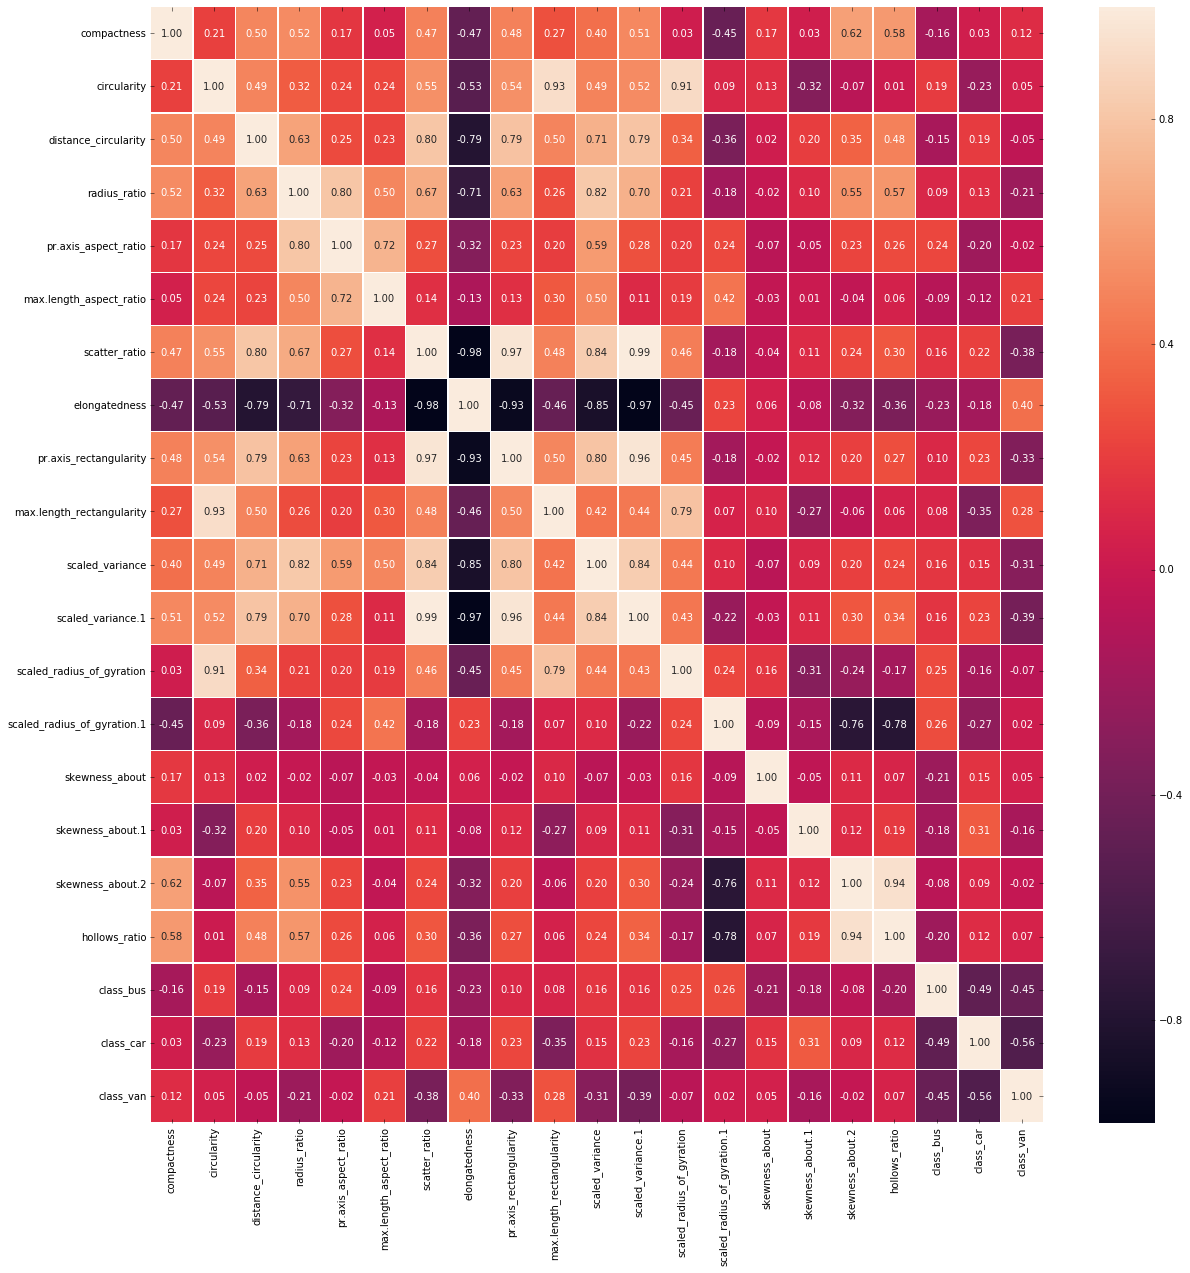

In [17]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr_df,annot=True,fmt='0.2f',linewidths=.5, ax=ax)

In [18]:
corr_df[abs(corr_df) > (0.80)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
compactness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circularity,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926537,...,NaN,0.91431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_circularity,NaN,NaN,1.000000,NaN,NaN,NaN,0.804295,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_ratio,NaN,NaN,NaN,1.000000,0.80312,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_aspect_ratio,NaN,NaN,NaN,0.803120,1.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_aspect_ratio,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scatter_ratio,NaN,NaN,0.804295,NaN,NaN,NaN,1.000000,-0.981378,0.967882,NaN,...,0.992922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elongatedness,NaN,NaN,NaN,NaN,NaN,NaN,-0.981378,1.000000,-0.931285,NaN,...,-0.974347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pr.axis_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,0.967882,-0.931285,1.000000,NaN,...,0.962916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max.length_rectangularity,NaN,0.926537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


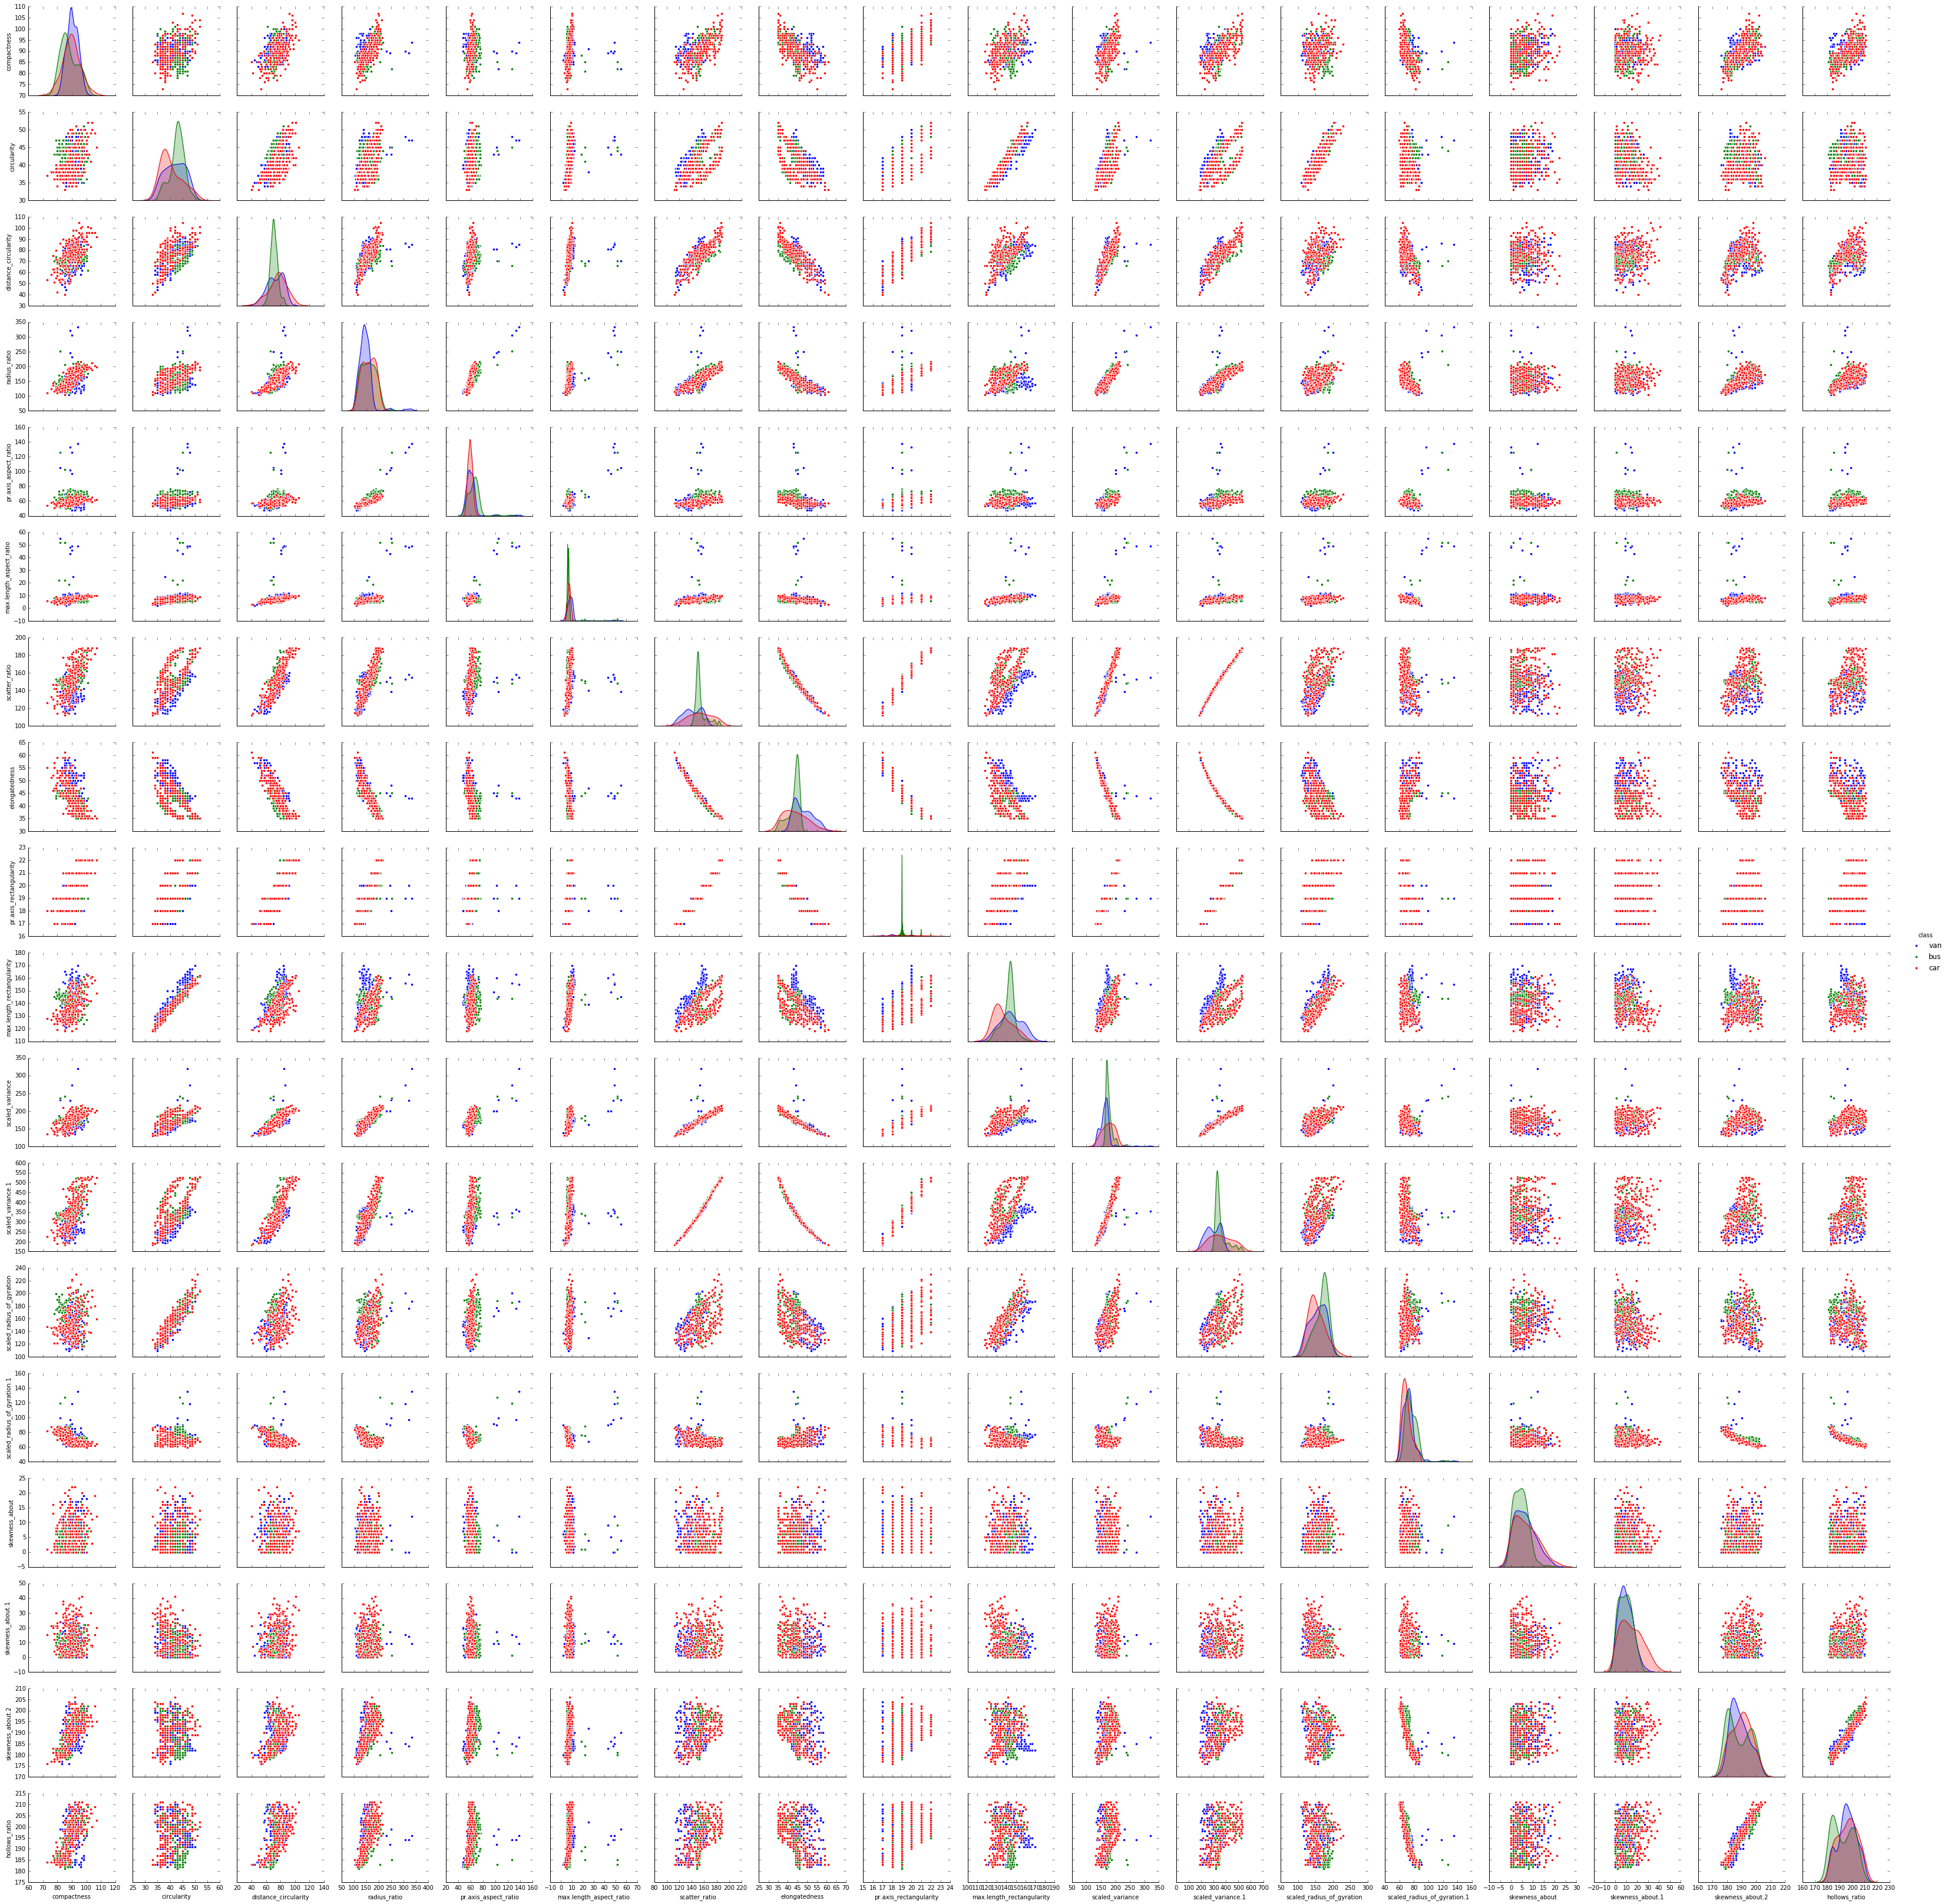

In [19]:
sns.pairplot(df_outliers_dropped, diag_kind='kde',hue='class')

In [20]:
from scipy.stats import zscore
df_zscored = df_one_hot_coded.apply(zscore)
df_zscored.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
32,0.639445,-1.663340,-0.751212,-0.050999,-0.289262,-0.404319,-0.482055,0.177525,-0.945286,-1.275895,...,-0.450467,-1.715809,-1.040289,-0.231375,0.179254,1.125958,0.845902,-0.627060,1.282638,-0.717295
825,-0.667417,-0.671642,0.982818,-0.224627,-0.518912,-0.029090,0.375928,-0.385454,0.782721,-0.788173,...,0.261878,-0.097748,0.170183,-1.297260,1.392597,-0.873644,-0.660451,-0.627060,1.282638,-0.717295
331,2.693086,2.551376,2.138839,1.129670,-0.289262,0.158524,2.337032,-1.886732,2.510727,1.943072,...,2.530830,2.001358,-0.677147,1.047687,-0.427418,0.554643,0.594843,-0.627060,1.282638,-0.717295
449,0.266056,-0.671642,0.790148,0.296256,0.744160,0.346139,-0.420770,0.177525,-0.081283,-0.397995,...,-0.397701,-0.054017,-0.556100,1.474041,-0.306084,0.268986,0.720373,-0.627060,-0.779643,1.394127
314,0.079361,0.072131,-1.040217,-1.023315,-0.748561,-0.216704,0.130790,-0.010135,-0.081283,0.089727,...,-0.028337,0.601954,1.017513,-1.297260,0.421922,-1.302130,-1.413627,1.594744,-0.779643,-0.717295


In [21]:
df_zscored.columns[-3:] #removing this from training data

Index(['class_bus', 'class_car', 'class_van'], dtype='object')

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_zscored.drop(['class_bus', 'class_car', 'class_van'], axis = 1)
y = df_outliers_dropped['class'].astype('category').cat.codes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
linR = LinearRegression()

In [23]:
X.shape

(574, 18)

In [24]:
sfs_forward = SequentialFeatureSelector(linR, k_features=18, forward=True, scoring='r2', cv=5)
sfs_forward = sfs_forward.fit(x_train.values, y_train.values)
sfs_backward = SequentialFeatureSelector(linR, k_features=1, forward=False, scoring='r2', cv=5)
sfs_backward = sfs_backward.fit(x_train.values, y_train.values)
sfs_mix = SequentialFeatureSelector(linR, k_features=18, forward=True, scoring='r2', cv=5, floating=True)
sfs_mix = sfs_mix.fit(x_train.values, y_train.values)

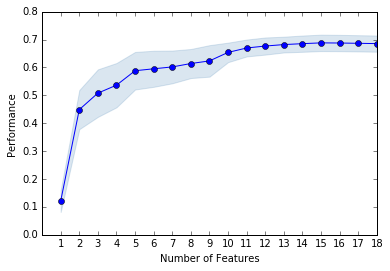

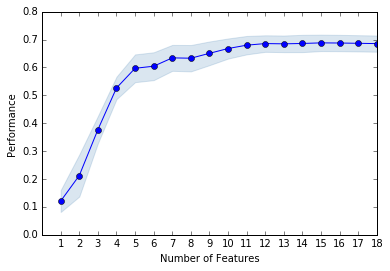

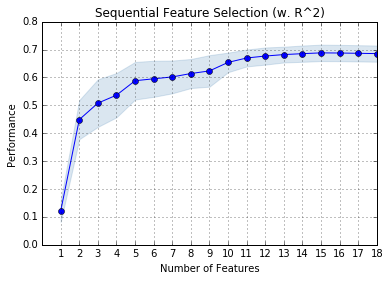

In [25]:
fig = plot_sfs(sfs_forward.get_metric_dict())
fig = plot_sfs(sfs_backward.get_metric_dict())
fig = plot_sfs(sfs_mix.get_metric_dict())
plt.title('Sequential Feature Selection (w. R^2)')
plt.grid()
plt.show()

In [27]:
sfs_forward.get_metric_dict()[12]['feature_idx']

(0, 1, 2, 3, 4, 5, 7, 9, 11, 15, 16, 17)

In [28]:
sfs_backward.get_metric_dict()[12]['feature_idx']

(0, 1, 2, 3, 4, 7, 9, 13, 14, 15, 16, 17)

In [29]:
sfs_mix.get_metric_dict()[12]['feature_idx']

(0, 1, 2, 3, 4, 5, 7, 9, 11, 15, 16, 17)

In [30]:
filter_indices = list(sfs_mix.get_metric_dict()[12]['feature_idx'])
np.array(x_train.columns)[filter_indices]

array(['compactness', 'circularity', 'distance_circularity',
       'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'elongatedness', 'max.length_rectangularity', 'scaled_variance.1',
       'skewness_about.1', 'skewness_about.2', 'hollows_ratio'],
      dtype=object)

### Observation
- There is a high correlation between elongatedness and scatter_ratio, pr.axis_rectangularity, scaled_variance, scaled_variance.1
- 9-11 seems to be ideal numbers based on the Sequential Feature select.

## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)

# Creating Co-variance matrix

pd.DataFrame(cov_matrix, columns=X.columns, index=X.columns)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.001745,0.213095,0.504267,0.525710,0.167557,0.054761,0.475356,-0.475806,0.479397,0.274867,0.400867,0.511858,0.029486,-0.451782,0.172659,0.034415,0.616164,0.586005
circularity,0.213095,1.001745,0.493526,0.319871,0.240546,0.235972,0.549835,-0.533133,0.545317,0.928154,0.488827,0.521432,0.915905,0.091247,0.132015,-0.320227,-0.071965,0.013070
distance_circularity,0.504267,0.493526,1.001745,0.631619,0.252511,0.232531,0.805699,-0.795275,0.788892,0.496485,0.706809,0.792756,0.338501,-0.364772,0.025013,0.195927,0.346231,0.476588
radius_ratio,0.525710,0.319871,0.631619,1.001745,0.804522,0.499738,0.671972,-0.707096,0.628738,0.260404,0.820214,0.701943,0.214453,-0.180761,-0.017854,0.096249,0.552518,0.574681
pr.axis_aspect_ratio,0.167557,0.240546,0.252511,0.804522,1.001745,0.717107,0.266471,-0.316793,0.226980,0.202257,0.590994,0.277743,0.201724,0.244509,-0.072556,-0.050203,0.233646,0.257290
max.length_aspect_ratio,0.054761,0.235972,0.232531,0.499738,0.717107,1.001745,0.135545,-0.130680,0.133704,0.304465,0.498675,0.110062,0.190827,0.424444,-0.031591,0.006217,-0.039909,0.058189
scatter_ratio,0.475356,0.549835,0.805699,0.671972,0.266471,0.135545,1.001745,-0.983090,0.969572,0.481786,0.845700,0.994655,0.461761,-0.181344,-0.037903,0.112723,0.238566,0.296552
elongatedness,-0.475806,-0.533133,-0.795275,-0.707096,-0.316793,-0.130680,-0.983090,1.001745,-0.932910,-0.457006,-0.848767,-0.976048,-0.446484,0.226744,0.055668,-0.079483,-0.317083,-0.362730
pr.axis_rectangularity,0.479397,0.545317,0.788892,0.628738,0.226980,0.133704,0.969572,-0.932910,1.001745,0.497829,0.799250,0.964596,0.451912,-0.177609,-0.024626,0.117782,0.204317,0.270840
max.length_rectangularity,0.274867,0.928154,0.496485,0.260404,0.202257,0.304465,0.481786,-0.457006,0.497829,1.001745,0.417094,0.440903,0.787885,0.068510,0.095954,-0.271412,-0.057537,0.056650


In [38]:
# Getting eigen values and eigen vectors

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [34]:
pd.DataFrame(eigenvalues, columns=['Eigen Values']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Eigen Values,7.826055,3.426033,2.064319,1.608148,0.936216,0.719491,0.506318,0.34283,0.180952,0.133905,0.100071,0.056265,0.047508,0.001553,0.00865,0.017776,0.026131,0.029193


In [35]:
pd.DataFrame(eigenvectors, index=X.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
compactness,0.214124,-0.231805,-0.070691,0.194440,-0.060123,-0.174075,0.787088,-0.331822,0.174242,0.130172,-0.156170,-0.060129,-0.112006,0.004888,0.017226,-0.069974,0.028184,-0.014740
circularity,0.230243,0.304752,-0.215416,0.255708,0.058790,0.221169,-0.072277,-0.161553,0.021191,0.005110,0.058462,0.098015,0.099663,0.036526,-0.067417,-0.425031,0.155565,0.651510
distance_circularity,0.306528,-0.061937,-0.076184,-0.083913,-0.088756,0.255604,0.062229,0.533003,0.568805,0.256595,0.215053,-0.244734,0.049542,-0.017645,-0.008408,0.069805,-0.146611,0.058794
radius_ratio,0.296827,-0.096929,0.320982,0.078475,0.024590,-0.129953,-0.158253,-0.140148,0.237833,-0.064449,-0.129654,0.249679,0.224692,-0.016061,-0.578766,0.404553,0.178490,0.100143
pr.axis_aspect_ratio,0.172269,0.071492,0.535219,0.200645,0.061295,-0.073768,-0.221175,-0.222167,0.395821,-0.314699,0.028212,-0.127047,-0.152319,0.033576,0.386779,-0.236033,-0.127017,-0.112259
max.length_aspect_ratio,0.117702,0.177214,0.514606,0.173097,-0.132582,0.238005,0.236951,0.420432,-0.391190,0.048632,-0.386260,0.033006,-0.129824,-0.021609,-0.002186,0.012086,-0.106273,0.135571
scatter_ratio,0.332270,0.024242,-0.104084,-0.236940,-0.009944,-0.128999,-0.028152,0.036042,-0.123259,-0.127534,-0.020713,-0.037082,-0.228086,0.791513,0.145643,0.220813,0.078499,0.123665
elongatedness,-0.333882,0.002705,0.080901,0.197284,-0.050585,0.147058,0.117945,-0.016182,0.129555,0.032095,-0.105084,-0.006486,0.643189,0.256327,0.418386,0.279927,0.177990,0.106352
pr.axis_rectangularity,0.322698,0.030839,-0.124028,-0.235841,-0.033742,-0.100844,0.050375,0.063427,-0.139641,-0.363619,-0.255436,-0.257506,0.574232,-0.014692,-0.112081,-0.314962,-0.195884,-0.206580
max.length_rectangularity,0.213972,0.275351,-0.196265,0.283035,0.057508,0.383789,0.207822,-0.022957,-0.088514,-0.409811,0.343323,0.242846,-0.014402,-0.052287,0.012060,0.285727,-0.057265,-0.353299


In [39]:
# Getting covariance & cumulative variance for the eigen values

variance = pd.DataFrame(eigenvalues, columns=['Variance of Eigen Vector']).T
variance = variance/eigenvalues.sum()
variance = variance.sort_values(axis=1, by='Variance of Eigen Vector', ascending=False)
variance.loc['Cumulative Variance of Eigen Vector'] = [n for n in variance.loc['Variance of Eigen Vector'].cumsum()]
variance

,0,1,2,3,4,5,6,7,8,9,10,11,12,17,16,15,14,13
Variance of Eigen Vector,0.434023,0.190004,0.114485,0.089186,0.051921,0.039902,0.028080,0.019013,0.010035,0.007426,0.005550,0.003120,0.002635,0.001619,0.001449,0.000986,0.000480,0.000086
Cumulative Variance of Eigen Vector,0.434023,0.624027,0.738512,0.827697,0.879619,0.919521,0.947601,0.966614,0.976649,0.984075,0.989625,0.992745,0.995380,0.996999,0.998448,0.999434,0.999914,1.000000


[Text(0.2, 0.43402336112691275, '0.4340'),
 Text(1.2, 0.6240269590904053, '0.6240'),
 Text(2.2, 0.7385115367448458, '0.7385'),
 Text(3.2, 0.8276974677293278, '0.8277'),
 Text(4.2, 0.8796188385089048, '0.8796'),
 Text(5.2, 0.9195209394476636, '0.9195'),
 Text(6.2, 0.9476007340507934, '0.9476'),
 Text(7.2, 0.9666136401998908, '0.9666'),
 Text(8.2, 0.9766490005447326, '0.9766'),
 Text(9.2, 0.9840752265086942, '0.9841'),
 Text(10.2, 0.9896250257118341, '0.9896'),
 Text(11.2, 0.9927454034650158, '0.9927'),
 Text(12.2, 0.9953801421083974, '0.9954'),
 Text(13.2, 0.9969991324377072, '0.9970'),
 Text(14.2, 0.9984483280631681, '0.9984'),
 Text(15.2, 0.9994341466705619, '0.9994'),
 Text(16.2, 0.9999138850473023, '0.9999'),
 Text(17.2, 0.9999999999999998, '1.0000')]

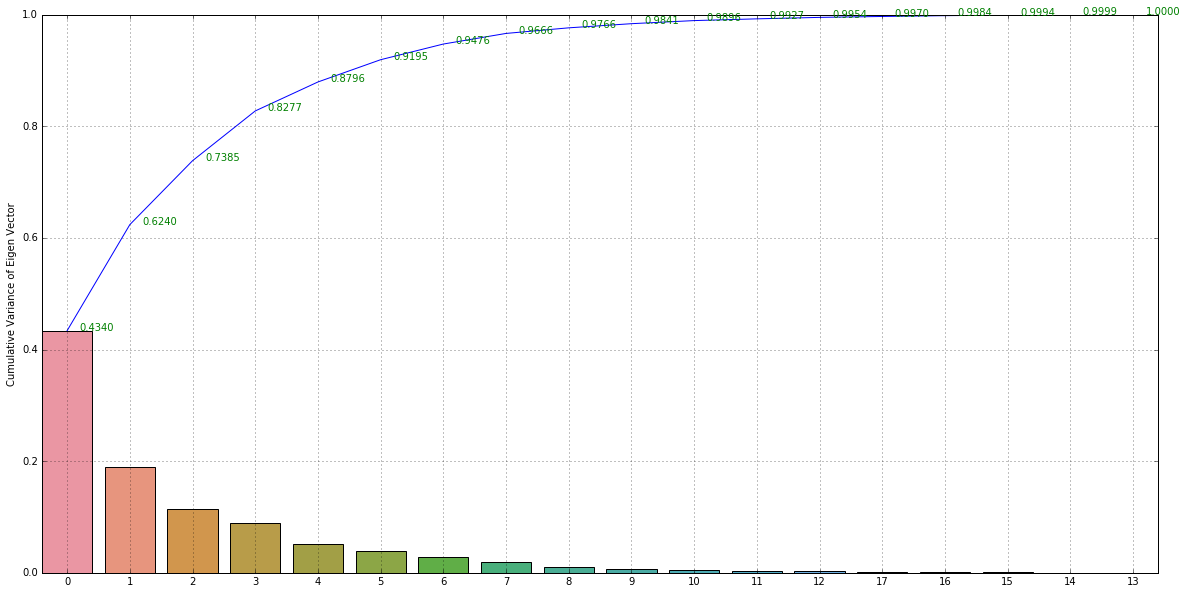

In [41]:
# Plotting the covariance & cumulative variance.

plt.figure(figsize=(20,10))
sns.barplot(x = variance.columns, y = variance.loc['Variance of Eigen Vector'], order=list(variance.columns))
ax = sns.lineplot(x = variance.columns.sort_values(), y = variance.loc['Cumulative Variance of Eigen Vector'])
plt.grid(axis='both')
[ax.text(p[0]+0.20, p[1], '{0:.4f}'.format(p[1]), color='g') for p in zip(ax.get_xticks(), variance.loc['Cumulative Variance of Eigen Vector'])]

### Observation
- We observe 8 components covering 96.66% of the total variance (above 95%)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pd.DataFrame(pca.components_, columns=X.columns)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.214124,0.230243,0.306528,0.296827,0.172269,0.117702,0.332270,-0.333882,0.322698,0.213972,0.315654,0.333060,0.183136,-0.084625,0.009800,0.018586,0.148316,0.173317
1,-0.231805,0.304752,-0.061937,-0.096929,0.071492,0.177214,0.024242,0.002705,0.030839,0.275351,0.089918,-0.008052,0.368766,0.433640,-0.014510,-0.204870,-0.431360,-0.407241
2,-0.070691,-0.215416,-0.076184,0.320982,0.535219,0.514606,-0.104084,0.080901,-0.124028,-0.196265,0.198650,-0.097694,-0.203993,0.282056,-0.167697,0.122832,0.043008,0.044406
3,-0.194440,-0.255708,0.083913,-0.078475,-0.200645,-0.173097,0.236940,-0.197284,0.235841,-0.283035,0.146853,0.221086,-0.189082,0.128754,-0.374075,0.420820,-0.273953,-0.260285
4,0.060123,-0.058790,0.088756,-0.024590,-0.061295,0.132582,0.009944,0.050585,0.033742,-0.057508,0.044303,-0.006356,0.016246,0.128690,0.811257,0.510331,-0.104765,-0.087344
5,-0.174075,0.221169,0.255604,-0.129953,-0.073768,0.238005,-0.128999,0.147058,-0.100844,0.383789,-0.148297,-0.173061,0.111717,-0.173093,-0.331376,0.574437,-0.011984,0.215470
6,0.787088,-0.072277,0.062229,-0.158253,-0.221175,0.236951,-0.028152,0.117945,0.050375,0.207822,0.005425,-0.041062,-0.274942,0.192091,-0.163296,-0.032011,-0.132663,-0.146150
7,0.331822,0.161553,-0.533003,0.140148,0.222167,-0.420432,-0.036042,0.016182,-0.063427,0.022957,-0.017863,0.017098,0.296769,0.178053,-0.138632,0.408612,0.137690,-0.047968


In [44]:
pca.explained_variance_

array([7.82605474, 3.42603346, 2.06431877, 1.60814841, 0.93621571,
       0.71949129, 0.50631839, 0.34282957])

In [45]:
pca.explained_variance_ratio_

array([0.43402336, 0.1900036 , 0.11448458, 0.08918593, 0.05192137,
       0.0399021 , 0.02807979, 0.01901291])

In [46]:
X_pca = pca.transform(X_std)
X_pca.shape

(574, 8)

In [47]:
pd.DataFrame(X_pca).head(10)

,0,1,2,3,4,5,6,7
0,2.864323,0.986681,-0.221058,-0.739897,0.162885,1.119647,0.360503,0.744945
1,0.113726,-0.403329,-0.502956,-0.153420,0.768085,0.502154,0.377636,-0.721937
2,0.232187,-2.429518,0.148275,-1.178461,-0.465117,0.617693,0.394730,-0.793493
3,2.448585,6.936159,9.353689,-1.037776,2.389584,-0.373361,1.186851,-0.881080
4,1.563471,-1.270508,-0.669505,-2.241377,0.123040,-1.309828,-0.140018,0.350461
5,-0.803870,-0.357870,0.225314,-1.858616,-1.420482,0.477427,-0.143119,0.258600
6,-3.935236,-3.535817,1.312420,-0.866021,-1.039862,0.787811,-0.427196,-0.164303
7,-2.474473,-2.080164,0.951258,-0.221591,-0.998581,0.407759,-0.260270,-0.766532
8,-4.031332,-3.614547,0.951672,0.214197,0.534527,0.856718,0.117670,0.318977
9,1.163552,1.023328,-0.263929,-0.568847,-0.450440,0.405048,-0.953655,0.875941


## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=6)

In [49]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.92


In [50]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.01, 0.05, 0.5, 1.0 ]    } ]
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
#Using 10 number of folds in a `(Stratified)KFold`

In [51]:
gs.fit(X_train, y_train) 

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.01, 0.05, 0.5, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
gs.best_score_

0.9607843137254902

### Observation
- For C=1.0 and kernal='linear', we have the highest accuracy of 96.07%
- This is cross validated with 10 number of folds in a `(Stratified)KFold`